# **Loan Data Analysis and Predictions**

## Load Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading and inspection

In [2]:
# Load the train and test data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Dimension
train_data.shape

(614, 13)

In [5]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
test_data.shape

(367, 12)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [9]:
# checking for missing values
train_data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

The training data (train.csv) contains 614 records with the following columns:

Features like: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term, Credit_History, and Property_Area.
Target Variable: Loan_Status (which indicates whether the loan was approved or not)


The test data (test.csv) contains 367 records with similar features, excluding the Loan_Status target column, as this is what we need to predict

Both datasets have missing values in several columns like Gender, Dependents, LoanAmount, Credit_History, etc.
The LoanAmount is numeric and has missing values in both datasets.
Categorical variables like Gender, Married, and Education need to be encoded for modeling.

In [11]:
#checking unique values in different variables
unique_values = {}
for col in train_data.columns:
    unique_values[col] = train_data[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [12]:
# Checking the value counts of each feature
for col in train_data:
  print(train_data[col].value_counts())
  print("-" * 50)

LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
--------------------------------------------------
Male      489
Female    112
Name: Gender, dtype: int64
--------------------------------------------------
Yes    398
No     213
Name: Married, dtype: int64
--------------------------------------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
--------------------------------------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
--------------------------------------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
--------------------------------------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
--------------------------------------

### Handling Missing values

In [13]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [14]:
# Fill missing numerical columns with the median
num_imputer = SimpleImputer(strategy='median')
train_data['LoanAmount'] = num_imputer.fit_transform(train_data[['LoanAmount']])
test_data['LoanAmount'] = num_imputer.transform(test_data[['LoanAmount']])

train_data['Loan_Amount_Term'] = num_imputer.fit_transform(train_data[['Loan_Amount_Term']])
test_data['Loan_Amount_Term'] = num_imputer.transform(test_data[['Loan_Amount_Term']])

train_data['Credit_History'] = num_imputer.fit_transform(train_data[['Credit_History']])
test_data['Credit_History'] = num_imputer.transform(test_data[['Credit_History']])

In [15]:
# Fill missing categorical columns with the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
train_data['Gender'] = cat_imputer.fit_transform(train_data[['Gender']])
test_data['Gender'] = cat_imputer.transform(test_data[['Gender']])

train_data['Married'] = cat_imputer.fit_transform(train_data[['Married']])
test_data['Married'] = cat_imputer.transform(test_data[['Married']])

train_data['Dependents'] = cat_imputer.fit_transform(train_data[['Dependents']])
test_data['Dependents'] = cat_imputer.transform(test_data[['Dependents']])

train_data['Self_Employed'] = cat_imputer.fit_transform(train_data[['Self_Employed']])
test_data['Self_Employed'] = cat_imputer.transform(test_data[['Self_Employed']])

In [16]:
train_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [17]:
test_data.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


## Visualization

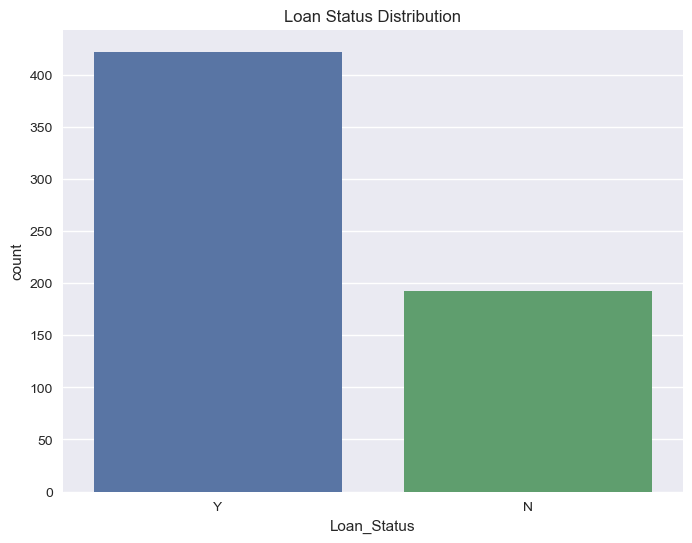

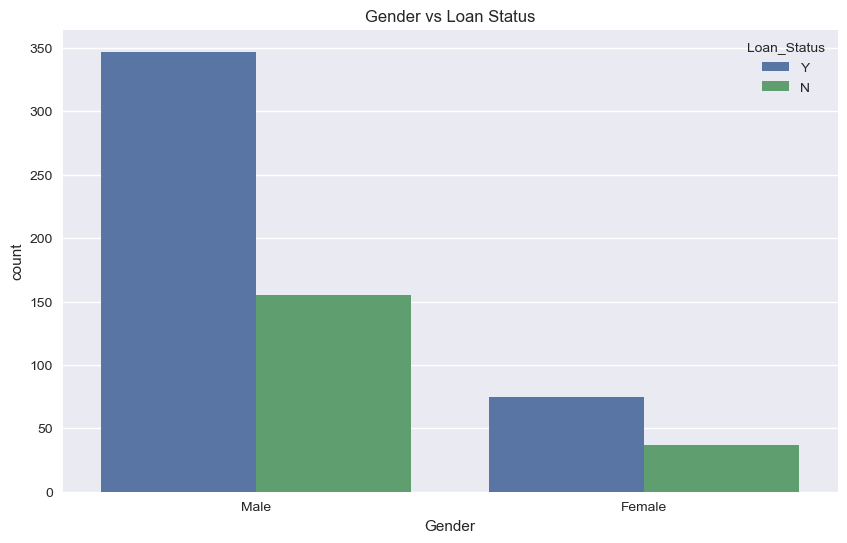

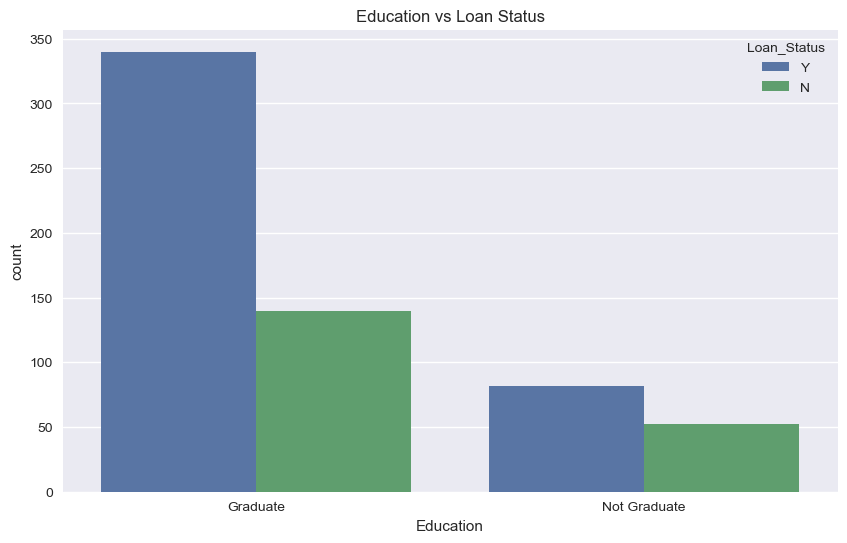

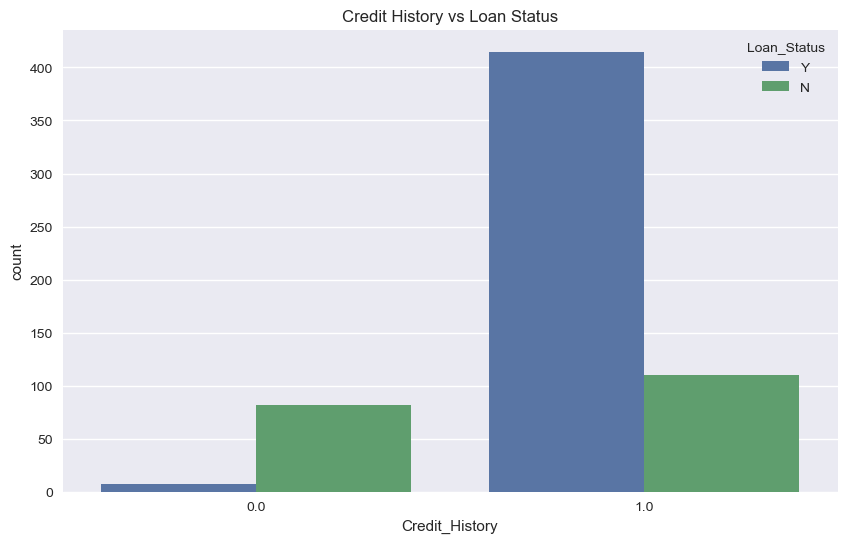

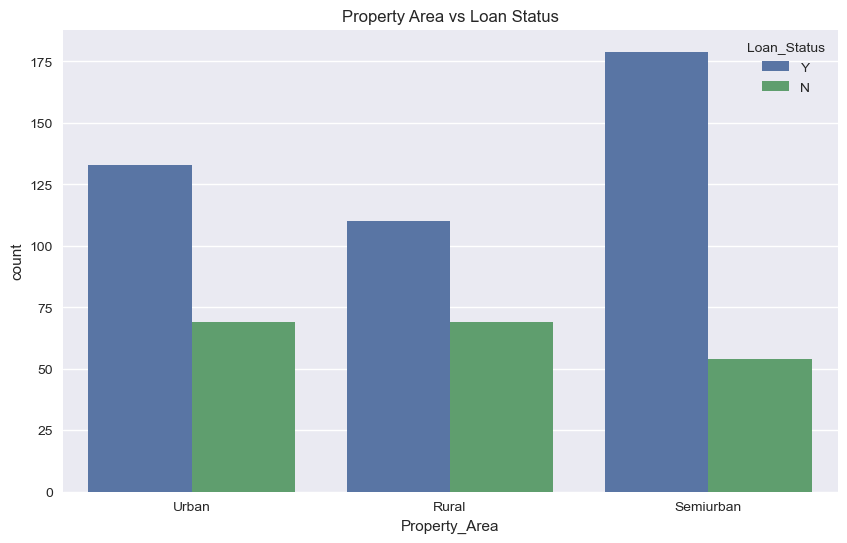

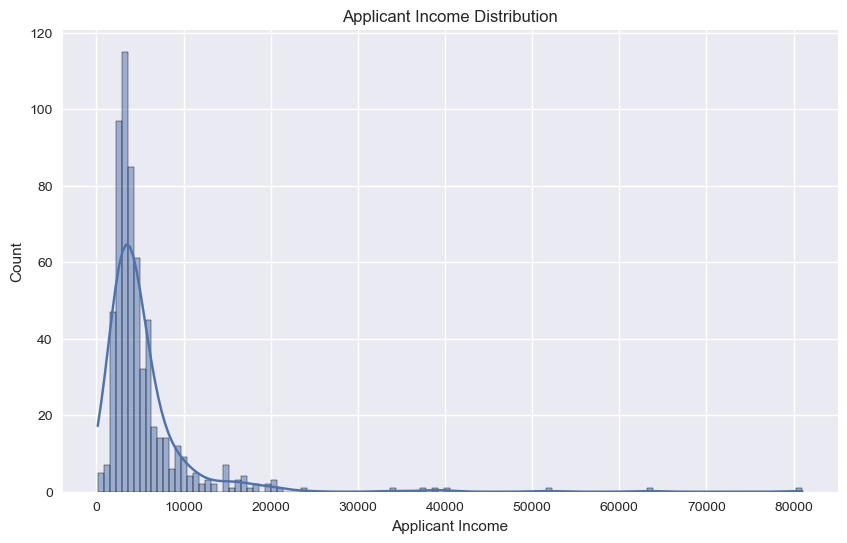

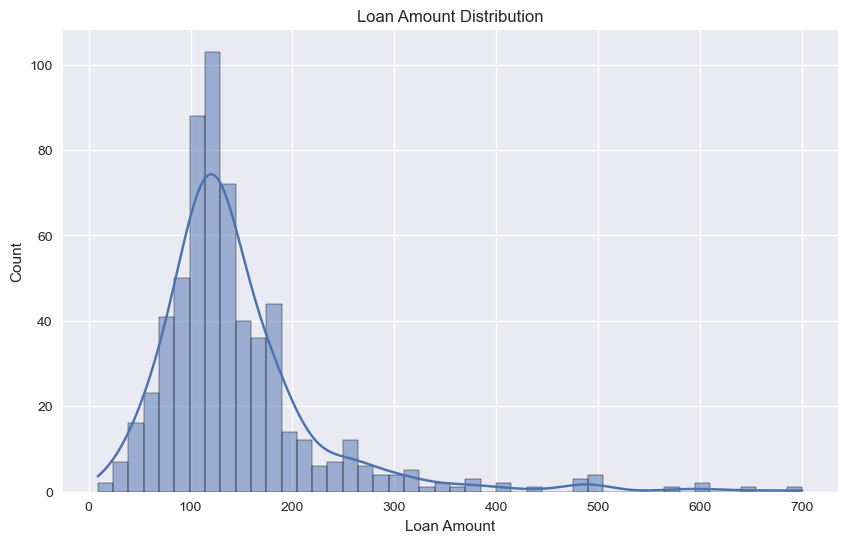

Visualizations created and saved.
Visualizations displayed.


In [18]:
# Set style for better-looking plots
plt.style.use('seaborn')

# Loan Status Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Loan_Status', data=train_data)
plt.title('Loan Status Distribution')
plt.savefig('loan_status_distribution.png')
plt.show()

# Gender vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=train_data)
plt.title('Gender vs Loan Status')
plt.savefig('gender_vs_loan_status.png')
plt.show()

# Education vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Loan_Status', data=train_data)
plt.title('Education vs Loan Status')
plt.savefig('education_vs_loan_status.png')
plt.show()

# Credit History vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=train_data)
plt.title('Credit History vs Loan Status')
plt.savefig('credit_history_vs_loan_status.png')
plt.show()

# Property Area vs Loan Status
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=train_data)
plt.title('Property Area vs Loan Status')
plt.savefig('property_area_vs_loan_status.png')
plt.show()

# Applicant Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.savefig('applicant_income_distribution.png')
plt.show()

# Loan Amount Distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['LoanAmount'], kde=True)
plt.title('Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.savefig('loan_amount_distribution.png')
plt.show()

print("Visualizations created and saved.")



print("Visualizations displayed.")

Loan Status Distribution:
The distribution shows the proportion of loans that were approved (Y) versus those that were not (N). It appears that a higher number of loans were approved.

Gender vs Loan Status:
This plot compares loan approval status across genders. It seems that both males and females have a similar pattern of loan approval, with a slightly higher number of approvals for males.

Education vs Loan Status:
This visualization shows the relationship between education level and loan approval. Graduates seem to have a higher approval rate compared to non-graduates.

Credit History vs Loan Status:
Credit history appears to be a strong indicator of loan approval. Applicants with a credit history of 1 (likely indicating a positive credit history) have a significantly higher approval rate.

Property Area vs Loan Status:
The plot shows loan approval status across different property areas. Urban and semiurban areas have higher approval rates compared to rural areas.

Applicant Income Distribution:
The distribution of applicant income is right-skewed, indicating that most applicants have a lower income, with a few having very high incomes.

Loan Amount Distribution:
Similar to applicant income, the loan amount distribution is also right-skewed, with most loans being of smaller amounts and a few being significantly larger.

These visualizations provide insights into factors that may influence loan approval, such as credit history, education, and property area. 

In [16]:
# Encoding categorical variables
label_encoder = LabelEncoder()

categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

In [17]:
# Apply label encoding for each categorical column
for column in categorical_columns:
    train_data[column] = label_encoder.fit_transform(train_data[column])
    test_data[column] = label_encoder.transform(test_data[column])

In [18]:
# Encoding the target variable
train_data['Loan_Status'] = label_encoder.fit_transform(train_data['Loan_Status'])


In [19]:
# Check if preprocessing was successful
train_data.head(), test_data.head()

(    Loan_ID  Gender  Married  Dependents  Education  Self_Employed  \
 0  LP001002       1        0           0          0              0   
 1  LP001003       1        1           1          0              0   
 2  LP001005       1        1           0          0              1   
 3  LP001006       1        1           0          1              0   
 4  LP001008       1        0           0          0              0   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0       128.0             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History  Property_Area  Loan_Status  
 0             1.0              2            1  
 1             1.0              0       

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Defining the features and target variable
X = train_data.drop(columns=['Loan_ID', 'Loan_Status'])
y = train_data['Loan_Status']

# Splitting the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Making predictions on the validation set
y_pred = model.predict(X_val)

# Evaluating the model
accuracy = accuracy_score(y_val, y_pred)
classification_rep = classification_report(y_val, y_pred)

# Displaying the accuracy and classification report
print(f"Validation Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_rep}")

Validation Accuracy: 0.7886178861788617
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



Model Evaluation Results:
Validation Accuracy: 78.86%

Classification Report:
Precision: Measures the accuracy of positive predictions. For class 1 (approved loans), the precision is 0.76.
Recall: Measures the ability to capture all positive cases. For class 1, the recall is 0.99, meaning almost all approved loans are correctly identified.
F1-Score: The harmonic mean of precision and recall. The F1-score for class 1 is 0.86.
Class 0 (rejected loans) has a lower recall (0.42), indicating that the model struggles to correctly identify rejected loans

In [24]:
# Prepare the test dataset for prediction (drop Loan_ID as it's not used for prediction)
X_test = test_data.drop(columns=['Loan_ID'])

# Make predictions on the test data
test_data['Loan_Status_Prediction'] = model.predict(X_test)

# Convert the numeric predictions back to the original labels
test_data['Loan_Status_Prediction'] = label_encoder.inverse_transform(test_data['Loan_Status_Prediction'])

# Save the predictions to a CSV file
output = test_data[['Loan_ID', 'Loan_Status_Prediction']]
output.to_csv('loan_predictions.csv', index=False)

# Display the first few rows of the output
output.head()


,Loan_ID,Loan_Status_Prediction
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [25]:
# Creating and training the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Making predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluating the model
rf_accuracy = accuracy_score(y_val, y_val_pred)
rf_classification_report = classification_report(y_val, y_val_pred)

print(f"Validation Accuracy: {rf_accuracy}")
print(f"Classification Report:\n{rf_classification_report}")

Validation Accuracy: 0.7560975609756098
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



Validation Accuracy: 75.61%

Performance:

Class 0 (Rejected loans): Slightly lower precision and recall compared to Logistic Regression, but more balanced (0.78 precision and 0.42 recall).
Class 1 (Approved loans): A bit lower recall (0.94) but similar precision (0.75), meaning the model performs comparably well for approved loans but is slightly less effective than Logistic Regression at identifying them.
F1-score: The F1-score for class 1 (0.83) is slightly lower than Logistic Regression's performance, suggesting that Logistic Regression might be better at classifying approved loans

In [30]:
# Ensure 'Loan_Status_Prediction' is not present in X_test
X_test = test_data.drop(columns=['Loan_ID', 'Loan_Status_Prediction'], errors='ignore')

# Make sure categorical columns in test data are processed as they were in training data
for column in categorical_columns:
    if X_test[column].dtype == 'object':
        # Apply the label encoding transformation
        X_test[column] = label_encoder.transform(X_test[column])

# Now, let's try making predictions on the test data again
test_data['Loan_Status_Prediction'] = rf_model.predict(X_test)

# Convert predictions back to original labels
test_data['Loan_Status_Prediction'] = label_encoder.inverse_transform(test_data['Loan_Status_Prediction'])

# Save the predictions to a CSV file
test_output = test_data[['Loan_ID', 'Loan_Status_Prediction']]
test_output.to_csv('loan_predictions_rf_fixed.csv', index=False)

# Display the first few rows of the output
print(test_output.head())


    Loan_ID Loan_Status_Prediction
0  LP001015                      Y
1  LP001022                      Y
2  LP001031                      Y
3  LP001035                      Y
4  LP001051                      N


Logistic Regression has a slightly higher accuracy and a higher recall for approved loans. However, it struggles with rejected loans, which could be an issue if predicting rejections accurately is important.
yes
Random Forest has a more balanced performance across both classes but falls short in overall accuracy and F1-score for approved loans compared to Logistic Regression.

In [ ]:
# # Encode categorical variables
# le = LabelEncoder()

# # Encode categorical columns in train dataset
# for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']:
#     train_data[column] = le.fit_transform(train_data[column])

# # Encode categorical columns in test dataset
# for column in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']:
#     test_data[column] = le.fit_transform(test_data[column])

# # Prepare data for training
# X = train_data.drop(['Loan_ID', 'Loan_Status'], axis=1)
# y = train_data['Loan_Status']

# # Split the data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# # Train the Random Forest Classifier
# model = RandomForestClassifier(random_state=42)
# model.fit(X_train, y_train)

# # Validate the model
# y_pred = model.predict(X_val)
# accuracy = accuracy_score(y_val, y_pred)

# print("Model trained. Validation accuracy: " + str(accuracy))

# # Predict on the test dataset
# X_test = test_data.drop(['Loan_ID'], axis=1)
# test_predictions = model.predict(X_test)

# print("Predictions on test dataset completed.")